In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import qmc, loguniform

import sys
sys.path.append('../../../')

from utils.plot import config_matplotlib, figsize, fig_save_and_show

config_matplotlib()
latex_img_path = '/home/joaoantoniocardoso/workspace_TCC/repo/tcc/imgs/'

256


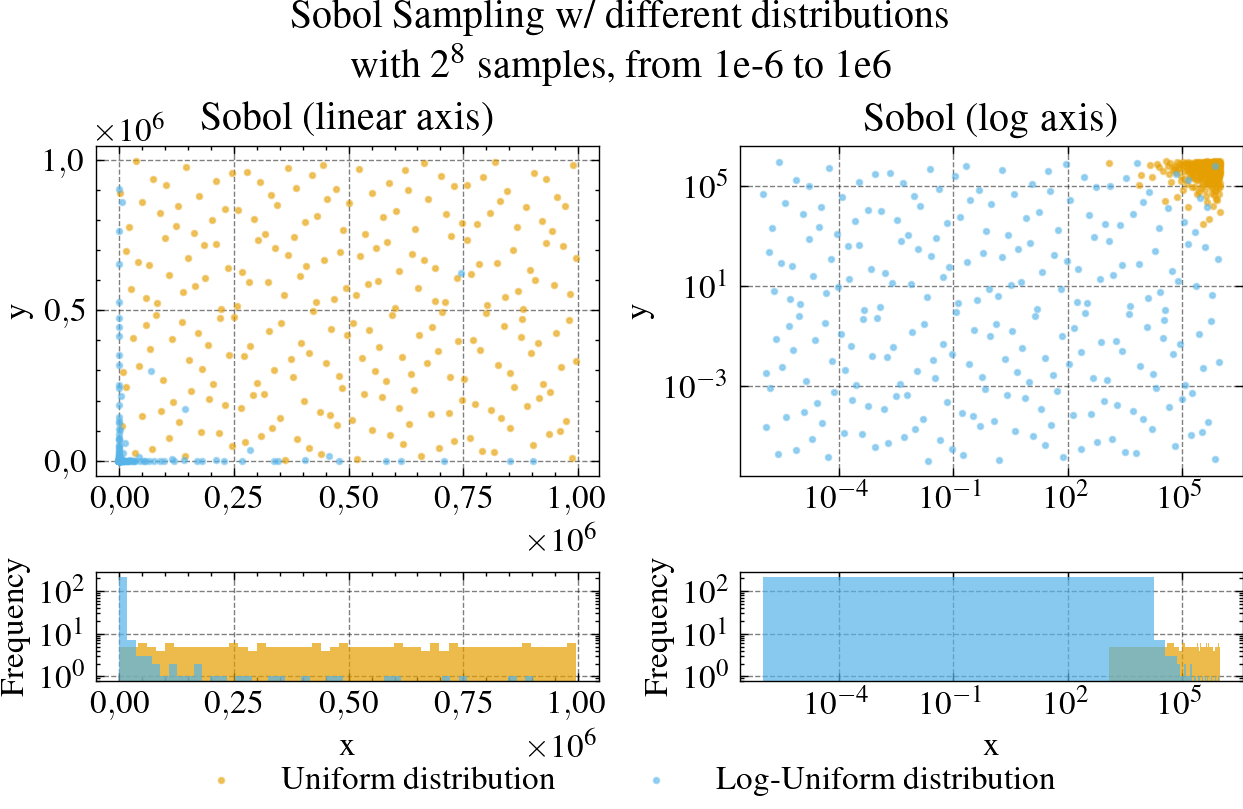

4096


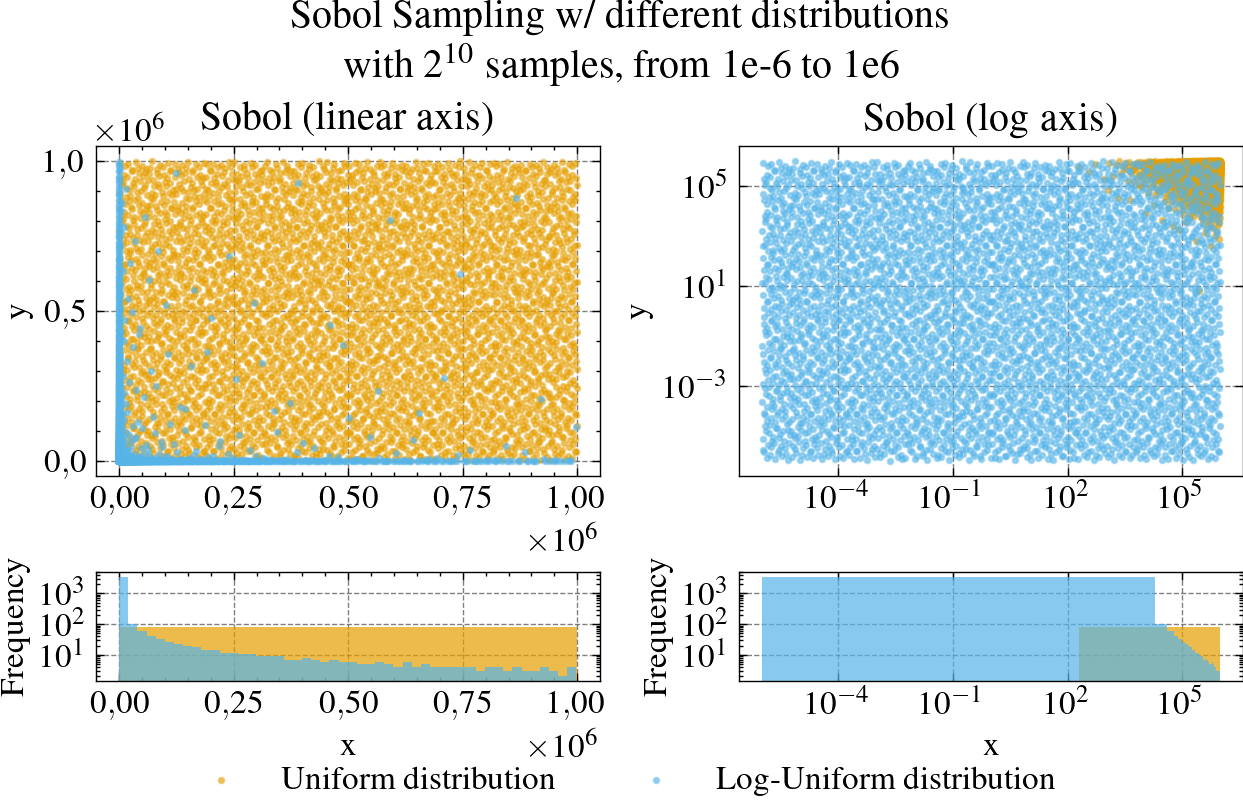

256


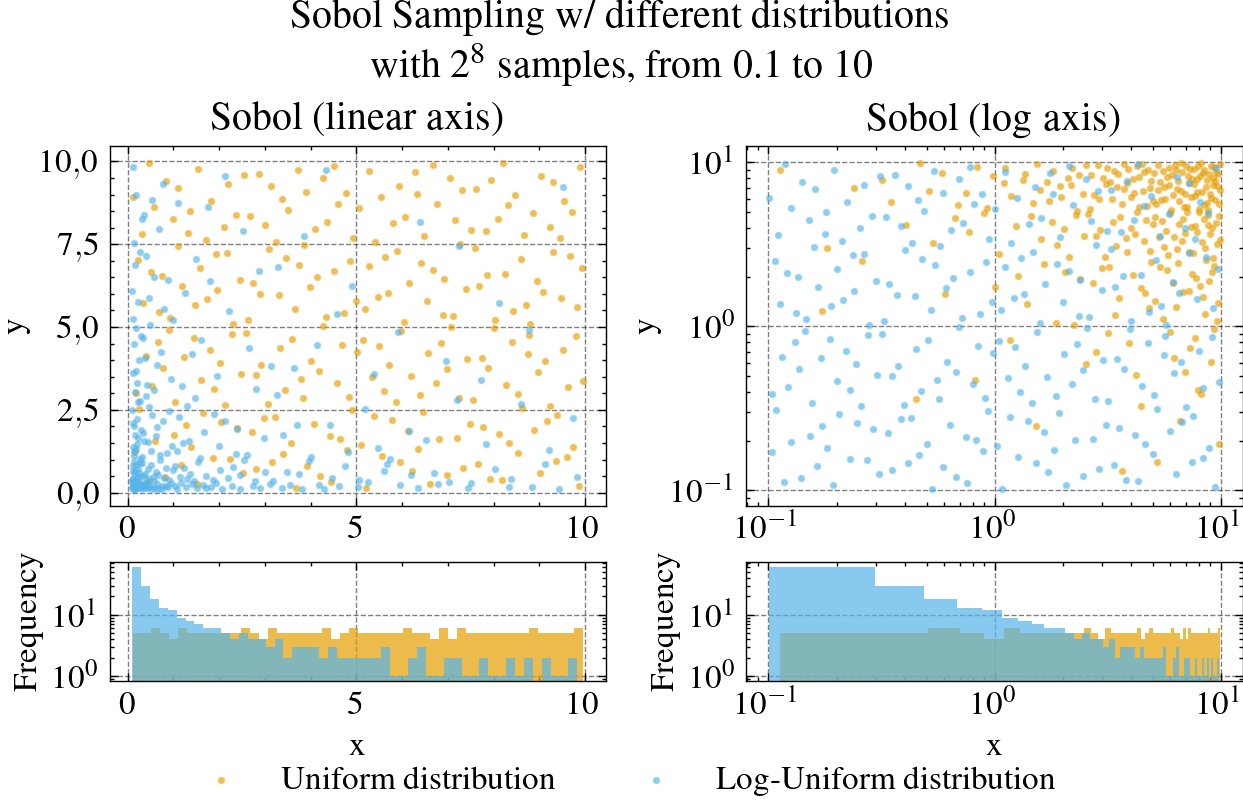

4096


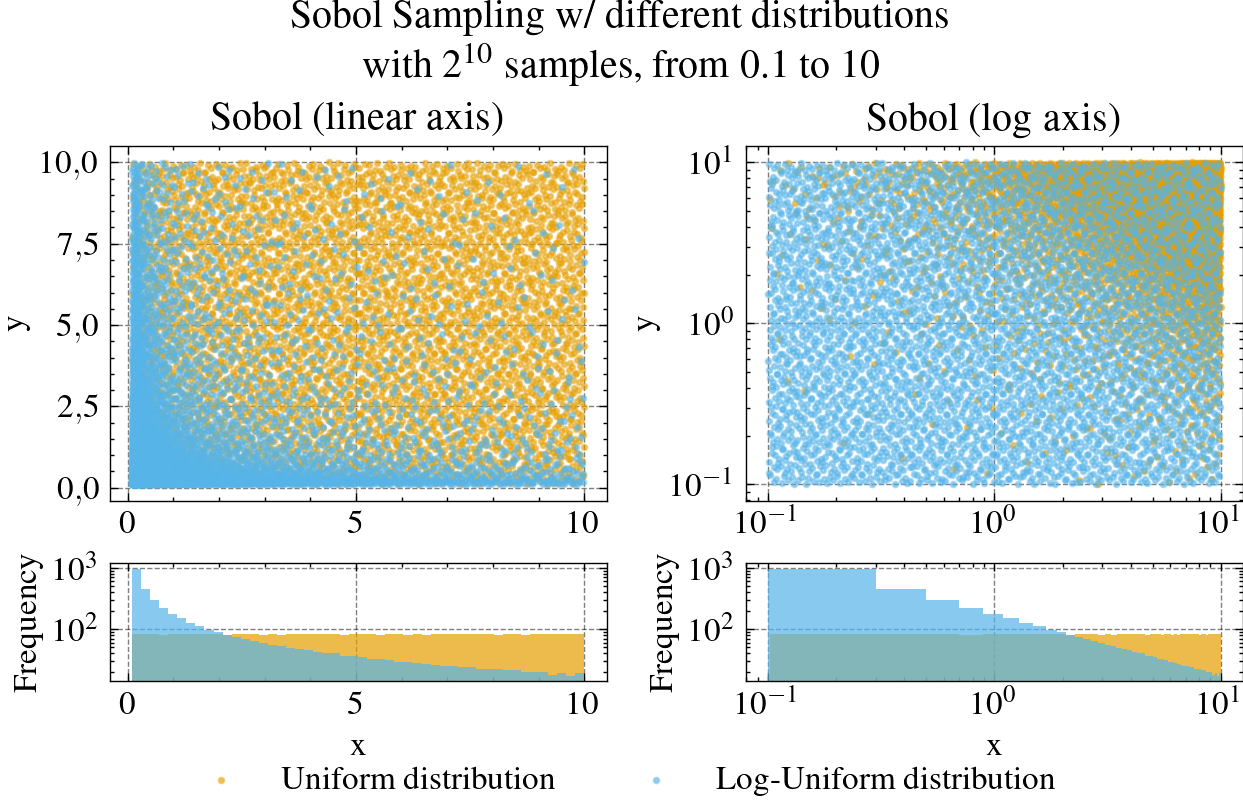

In [2]:
def sample(min_val, max_val, num_samples):
    # Sample with sobol
    # Ref: https://github.com/SALib/SALib/blob/076aa575ffe808248323ed04b222708b07d2a713/src/SALib/sample/sobol.py#L107-L108
    sobol_sampler = qmc.Sobol(d=2, scramble=True, seed=42)
    sobol_samples = sobol_sampler.random(num_samples)

    # Rescale the Sobol samples to the desired range for the distributions
    # Ref: https://github.com/SALib/SALib/blob/076aa575ffe808248323ed04b222708b07d2a713/src/SALib/util/__init__.py#L125-L126
    x_uniform_sobol = sobol_samples[:,0] * (max_val - min_val) + min_val
    y_uniform_sobol = sobol_samples[:,1] * (max_val - min_val) + min_val
    x_loguniform_sobol = loguniform.ppf(sobol_samples[:,0], min_val, max_val)
    y_loguniform_sobol = loguniform.ppf(sobol_samples[:,1], min_val, max_val)

    print(len(x_loguniform_sobol))

    # Plot

    subplots = (2,2)
    width, height = figsize(subplots=subplots)
    fig, ax = plt.subplots(*subplots, figsize=(width, height), layout="constrained", gridspec_kw={'height_ratios': [3, 1], 'width_ratios': [1, 1]}, sharex=False, sharey=False)

    ax[0][0].set_title('Sobol (linear axis)')
    ax[0][0].scatter(x_uniform_sobol, y_uniform_sobol, s=3, alpha=0.5, label='Uniform distribution')
    ax[0][0].scatter(x_loguniform_sobol, y_loguniform_sobol, s=3, alpha=0.5, label='Log-Uniform distribution')
    ax[0][0].set_ylabel('y')

    ax[1][0].hist(x_uniform_sobol, bins=50, alpha=0.7)
    ax[1][0].hist(x_loguniform_sobol, bins=50, alpha=0.7)
    ax[1][0].set_xlabel('x')
    ax[1][0].set_ylabel('Frequency')
    ax[1][0].set_yscale('log')

    ax[0][1].set_title('Sobol (log axis)')
    ax[0][1].scatter(x_uniform_sobol, y_uniform_sobol, s=3, alpha=0.5)
    ax[0][1].scatter(x_loguniform_sobol, y_loguniform_sobol, s=3, alpha=0.5)
    ax[0][1].set_ylabel('y')
    ax[0][1].set_xscale('log')
    ax[0][1].set_yscale('log')

    ax[1][1].hist(x_uniform_sobol, bins=50, alpha=0.7)
    ax[1][1].hist(x_loguniform_sobol, bins=50, alpha=0.7)
    ax[1][1].set_xlabel('x')
    ax[1][1].set_ylabel('Frequency')
    ax[1][1].set_xscale('log')
    ax[1][1].set_yscale('log')

    return fig

fig_save_and_show(
    filename=f'{latex_img_path}/sobol_sampling_with_different_distributions_with_{2**8}_samples_wide_range.pdf',
    save_title='Amostragem de Sobol com diferentes distribuições\ncom $2^{8}$ amostras, de 1e-6 a 1e6',
    show_title='Sobol Sampling w/ different distributions\nwith $2^{8}$ samples, from 1e-6 to 1e6',
    fig=sample(1e-6, 1e6, 2**8),
)
fig_save_and_show(
    filename=f'{latex_img_path}/sobol_sampling_with_different_distributions_with_{2**10}_samples_wide_range.pdf',
    save_title='Amostragem de Sobol com diferentes distribuições\ncom $2^{10}$ amostras, de 1e-6 a 1e6',
    show_title='Sobol Sampling w/ different distributions\nwith $2^{10}$ samples, from 1e-6 to 1e6',
    fig=sample(1e-6, 1e6, 2**12),
)
fig_save_and_show(
    filename=f'{latex_img_path}/sobol_sampling_with_different_distributions_with_{2**8}_samples_narrow_range.pdf',
    save_title='Amostragem de Sobol com diferentes distribuições\ncom $2^{8}$ amostras, de 0.1 a 10',
    show_title='Sobol Sampling w/ different distributions\nwith $2^{8}$ samples, from 0.1 to 10',
    fig=sample(0.1, 10, 2**8),
)
fig_save_and_show(
    filename=f'{latex_img_path}/sobol_sampling_with_different_distributions_with_{2**10}_samples_narrow_range.pdf',
    save_title='Amostragem de Sobol com diferentes distribuições\ncom $2^{10}$ amostras, de 0.1 a 10',
    show_title='Sobol Sampling w/ different distributions\nwith $2^{10}$ samples, from 0.1 to 10',
    fig=sample(0.1, 10, 2**12),
)

We can see on the graph that we should always choose log-uniform sampling when the data range over order of magnitudes, and just uniform otherwise.